In [53]:
import numpy as np

In [54]:
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter= 50, random_state=1):
      self.eta = eta
      self.n_iter = iter
      self.random_state = random_state

  def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc= 0.0, scale= 0.01, size= 1+X.shape[1])
      self.errors_ = []

      for _ in range(self.n_iter):
          errors = 0
          for xi, target in zip(X, y):
              update = self.eta * (target - self.predict(xi))
              self.w_[1:] += update * xi
              self.w_[0] += update
              errors += int(update != 0.0)
          self.errors_.append(errors)
      return self

  def net_input( self, X): 
       return np.dot (X, self.w_[1:]) + self.w_[0]

  def predict ( self, X):
       return np.where (self.net_input(X) >= 0.0, 1, -1)       



In [55]:
v1 = np.array ([ 1, 2, 3])
v2 = 0.5 * v1
np.arccos (v1.dot( v2) / (np.linalg.norm (v1) * np.linalg.norm(v2)))

0.0

In [56]:
import pandas as pd

In [57]:
df = pd.read_csv ('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
y = df.iloc[ 0:100, 4].values
y = np.where (y == 'iris-sentosa', -1, 1)

In [63]:
X = df.iloc[ 0:100, [0,2]].values

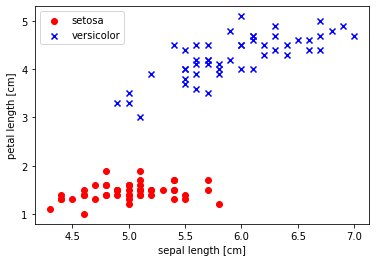

In [64]:
plt.scatter ( X[:50, 0], X[:50, 1],
             color = 'red', marker = 'o', label='setosa')
plt.scatter ( X[ 50:100, 0], X[ 50:100, 1],
             color ='blue', marker= 'x', label= 'versicolor')

plt.xlabel ( 'sepal length [cm]')
plt.ylabel ( 'petal length [cm]')
plt.legend ( loc = 'upper left')

plt.show()

In [65]:

class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

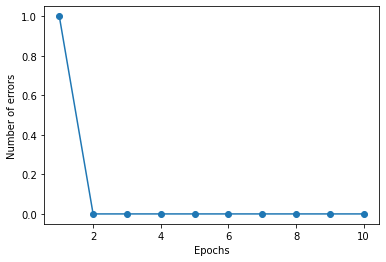

In [66]:
 ppn = Perceptron ( eta = 0.1, n_iter = 10)

 ppn.fit ( X, y)

 plt.plot (range (1, len(ppn.errors_)+1), ppn.errors_, marker = 'o')
 plt.xlabel ('Epochs')
 plt.ylabel ( 'Number of errors')

 plt.show()